# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 02.02.2024

Мягкий дедлайн: 23:59MSK 26.02.2024

Жесткий дедлайн: 23:59MSK 09.03.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [1]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [ ]:
!wget -O my_train.csv -q 'https://www.dropbox.com/scl/fi/bwv1vze6hr9zbnm8ni15d/train.csv?rlkey=20n7tyr2o2g4nvzjexmrnl6as&dl=0'

In [49]:
data = pd.read_csv("train-2.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [50]:
data = data.drop(columns=['dropoff_datetime'])
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

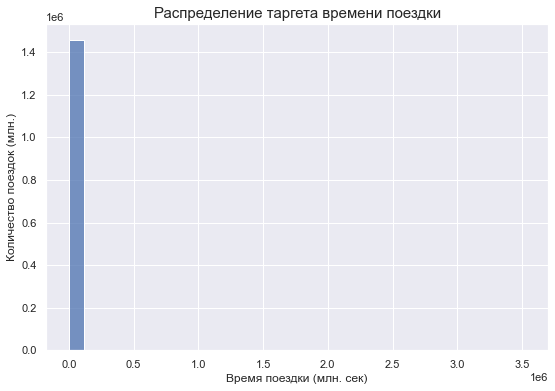

In [51]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение таргета времени поездки', fontsize=15)
ax.set_xlabel('Время поездки (млн. сек)')
ax.set_ylabel('Количество поездок (млн.)')
sns.histplot(data['trip_duration'].values, bins=30, ax=ax);

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

In [52]:
print("Посмотрим на минимальное, максимальное и средние  значения:")
print("Максимум", data['trip_duration'].max(), "минимум", data['trip_duration'].min(), "среднее", data['trip_duration'].mean())

Посмотрим на минимальное, максимальное и средние  значения:
Максимум 3526282 минимум 1 среднее 959.4922729603659


Можно заметить, что значения в среднем не очень большие, в районе 1000, однако есть выбросы. Это не дает нам получить хорошую картинку распределения данных. Они почти все малы относительно огромного значения в 3 миллиона.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Из-за выбросов и большого разброса значений удобнее оценивать отклонение не самих величин, а их логарифмов.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

$\displaystyle \text{MSE}(X, \hat{y}, \hat{a}) = \sqrt{\frac{1}{\ell} \sum \limits_{i = 1}^{\ell} (\hat{y_i} - \hat{a}(x_i))^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \text{RMSLE}(X, y, a)$.

Откуда если $y~-$  минимум $\text{RMSLE}$ для $X, a$, то $\hat{y}~-$ минимум $\text{MSE}$ для $X, \hat{a}$.

\
Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

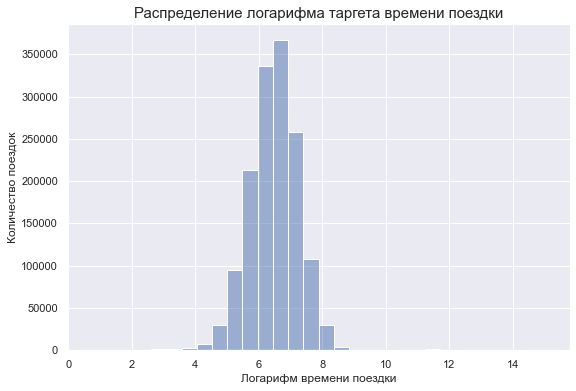

In [53]:

data['log_trip_duration'] = np.log1p(data['trip_duration'].values)
data = data.drop(columns=['trip_duration'])
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение логарифма таргета времени поездки', fontsize=15)
ax.set_xlabel('Логарифм времени поездки')
ax.set_ylabel('Количество поездок')
sns.histplot(np.array(data['log_trip_duration']), bins=30, kde=True, ax=ax)

Теперь получили распределение похожее на нормальное.


In [57]:
data['log_trip_duration'].dtype

dtype('float64')

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [58]:
from sklearn.metrics import mean_squared_error

def rmsle(log1p_y_true, log1p_y_pred):

    return mean_squared_error(log1p_y_true, log1p_y_pred, squared = False)
    raise NotImplementedError

best_const = data['log_trip_duration'].mean()
log1p_y_true = data['log_trip_duration'].values
rmsle_best_const = rmsle(log1p_y_true, best_const * np.ones(log1p_y_true.shape))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

Первый день: 2016-01-01 00:00:17 Последний день 2016-06-30 23:59:39
Количество дней: 182


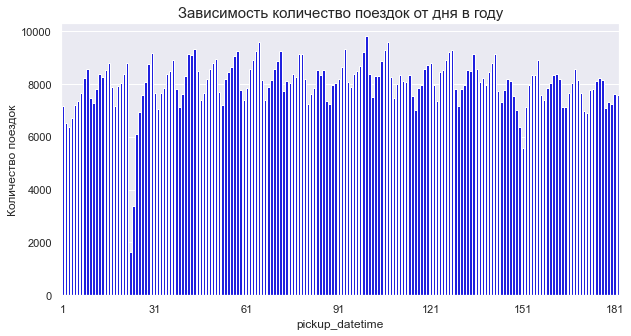

In [59]:
print("Первый день:", data['pickup_datetime'].min(), "Последний день", data['pickup_datetime'].max())
days = data['pickup_datetime'].dt.dayofyear
print("Количество дней:", len(days.unique()))

fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=days, color='blue', ax=ax)
plt.xticks(np.arange(0, 181, 30))
plt.ylabel('Количество поездок', fontsize=12)
plt.title('Зависимость количество поездок от дня в году', fontsize=15);

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.



In [60]:
import datetime

cnt = days.value_counts()
print("Номера аномальных дней:")
print(*cnt[cnt < 6000].index)

print("Даты аномальных дней:")
print(datetime.date(2016, 1, 1) + datetime.timedelta(22), end = ' ')
print(datetime.date(2016, 1, 1) + datetime.timedelta(23), end = ' ')
print(datetime.date(2016, 1, 1) + datetime.timedelta(150))

Номера аномальных дней:
151 24 23
Даты аномальных дней:
2016-01-23 2016-01-24 2016-05-30


23 января 2016 года власти запретили автомобильное движение в Нью-Йорке из-за снежной бури.

30 мая 2016 года были проливные дожди и риск затопления.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

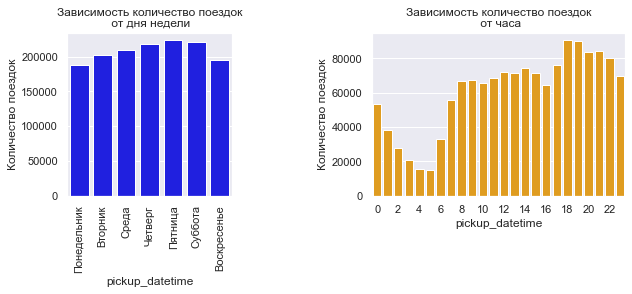

In [61]:
plt.figure(figsize=(10, 3))

weeks = data['pickup_datetime'].dt.weekday
ax = plt.subplot(1, 3, 1)
sns.countplot(x=weeks, color='blue', ax=ax)
plt.xticks(np.arange(7),
           labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
           rotation=90)
plt.ylabel('Количество поездок')
plt.title('Зависимость количество поездок\n от дня недели')

hours = data['pickup_datetime'].dt.hour
ax = plt.subplot(1, 2, 2)
sns.countplot(x=hours, color='orange', ax=ax)
plt.xticks(np.arange(0, 24, 2))
plt.ylabel('Количество поездок')
plt.title('Зависимость количество поездок\n от часа');


**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

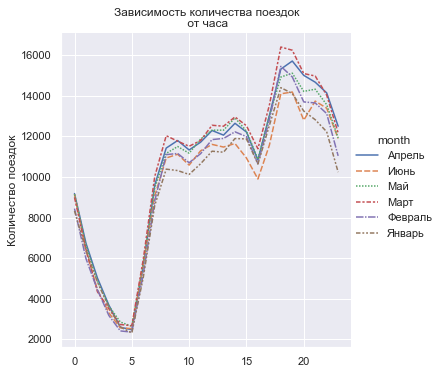

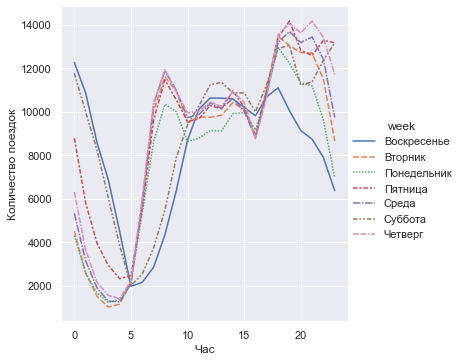

In [62]:
def to_month(ind):
    month = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль']
    return month[ind - 1]

def to_week(ind):
    week = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
    return week[ind]


data['month'] = data['pickup_datetime'].dt.month
data['hour'] = data['pickup_datetime'].dt.hour
data['week'] = data['pickup_datetime'].dt.weekday
data['day'] = data['pickup_datetime'].dt.dayofyear
data['snow_anomaly'] = ((data['day'] == 23) | (data['day'] == 24))
data['rain_anomaly'] = (data['day'] == 151)


val = data.groupby(['hour', 'month']).count()[['id']]
val.reset_index(inplace=True)
val['month'] = val['month'].apply(to_month)
sns.relplot(data=val.pivot(index = 'hour', columns = 'month', values = 'id'), kind='line');
plt.xlabel('')
plt.ylabel('Количество поездок')
plt.title('Зависимость количества поездок\n от часа')

val = data.groupby(['hour', 'week']).count()[['id']]
val.reset_index(inplace=True)
val['week'] = val['week'].apply(to_week)
sns.relplot(data=val.pivot(index = 'hour', columns = 'week', values = 'id'), kind='line')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.title('');

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

От месяца практически ничего не зависит, картина выглядит почти одинаковой. Однако за неделю явно выделятся выходные (люди не ездят на работу). Ночью количество поездок мало (люди спят), скачки к 8 утра и 20 (люди едут на работу и обратно)

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

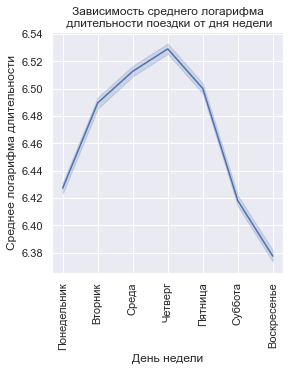

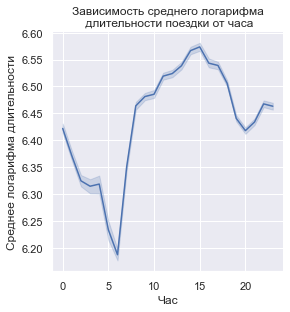

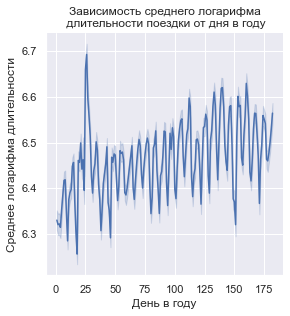

In [63]:
from sklearn.model_selection import train_test_split

X = data.copy()
y = data['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

sns.relplot(data=X_train, x='week', y='log_trip_duration', kind = 'line', height = 4)
plt.xticks(np.arange(7),
           labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
           rotation=90)
plt.xlabel('День недели')
plt.ylabel('Среднее логарифма длительности')
plt.title('Зависимость среднего логарифма\n длительности поездки от дня недели');


sns.relplot(data=X_train, x='hour', y='log_trip_duration', kind = 'line', height = 4)
plt.xlabel('Час')
plt.ylabel('Среднее логарифма длительности')
plt.title('Зависимость среднего логарифма\n длительности поездки от часа');

sns.relplot(data=X_train, x='day', y='log_trip_duration', kind = 'line', height = 4)
plt.xticks(np.arange(0, 181, 25))
plt.xlabel('День в году')
plt.ylabel('Среднее логарифма длительности')
plt.title('Зависимость среднего логарифма\n длительности поездки от дня в году');


**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Для графиков от часа в сутках графики похожи. По видимому, чем "популярней" время, тем больше загруженность на дорогах => пробки из-за чего длительность поездки увеличивается или уменьшается.

А графики от дней недели почти не похожи, у логарифма длительности пик приходится на четверг, а у количества поездок на пятницу.

Во время бури зимой длительность поездок резко возрасла (видимо в экстремальных условиях ехать приходилось медленно).

Во время ливня длительнось поездок резко уменьшилась (видимо люди боялись выезжать куда-то при такой погоде).

Заметна тенденция роста времени поездки от зимы к лету (похожая на линейную). А также тренд зависит от дня недели, поэтому присутствуют колебания с периодом в 7 дней.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [64]:
X_train.sample(10)


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,hour_of_day,month,hour,week,day,snow_anomaly,rain_anomaly
637494,id2807880,2,2016-04-19 18:57:31,1,-73.982422,40.768551,-73.952759,40.764542,N,6.760415,1,18,4,18,1,110,False,False
425332,id3476114,2,2016-06-29 12:33:16,3,-73.990189,40.731178,-73.974808,40.744370,N,6.466145,2,12,6,12,2,181,False,False
656756,id3431688,1,2016-04-02 23:49:11,1,-73.974159,40.754192,-73.956963,40.780369,N,6.230481,5,23,4,23,5,93,False,False
342535,id0944563,1,2016-04-03 16:19:13,2,-73.982368,40.739632,-73.994400,40.720421,N,6.942157,6,16,4,16,6,94,False,False
661706,id1336454,2,2016-01-17 02:48:07,1,-73.968140,40.755600,-73.942307,40.847294,N,6.996681,6,2,1,2,6,17,False,False
484319,id3517570,1,2016-02-11 21:16:46,1,-74.000015,40.753880,-73.966927,40.799110,N,6.669498,3,21,2,21,3,42,False,False
1306133,id3609298,1,2016-03-23 11:23:14,1,-74.001259,40.729279,-74.008377,40.708973,N,7.189168,2,11,3,11,2,83,False,False
275647,id0216436,1,2016-02-21 15:53:50,1,-73.781410,40.644993,-73.985161,40.759033,N,8.190077,6,15,2,15,6,52,False,False
1392263,id3387592,2,2016-06-10 20:48:24,2,-73.968079,40.761940,-73.986504,40.730259,N,6.364751,4,20,6,20,4,162,False,False
496472,id1117569,1,2016-04-03 13:31:36,1,-73.972420,40.786339,-73.982521,40.764351,N,6.525030,6,13,4,13,6,94,False,False


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Возможно было бы правильней все признаки рассматривать, как категориальные, однако тогда будет слишком много признаков, по большей части признаков добавит номер дня (180 штук). Поэтому его как раз можно сделать численным, как было замечено ранее, тренд все равно растет примерно линейно, при увеличении дня.

Остальные признаки можно сделать категориальными, это не будет критично.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge


categorical = ['month', 'week', 'hour', 'snow_anomaly', 'rain_anomaly', 'store_and_fwd_flag']
numeric_features = ['day']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))



Test RMSE = 0.7873
Train RMSE = 0.7893


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [66]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [67]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [68]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Люди часто заказывают такси в аэропорты, чтоб не оставлять свою машину на долгий срок на парковке и удобно транспортировать вещи. Поэтому можно выделить точки у аэропортов. Такие поездки отличаются от поездок на работу по городу, соответсвенно для них могут дейтвовать свои тенденции и модель должна учитывать это.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [69]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

data['haversine'] = haversine_array(data['pickup_latitude'].values, data['pickup_longitude'].values, data['dropoff_latitude'].values, data['dropoff_longitude'].values)
data.sample(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,hour_of_day,month,hour,week,day,snow_anomaly,rain_anomaly,haversine
216375,id2219513,2,2016-01-10 00:37:28,5,-73.971130,40.762661,-73.989952,40.767361,N,6.269096,6,0,1,0,6,10,False,False,1.669055
753495,id1445616,2,2016-05-14 10:28:11,3,-73.998199,40.745728,-73.981346,40.768715,N,6.590301,5,10,5,10,5,135,False,False,2.923798
1182328,id1813644,2,2016-05-28 09:48:14,1,-73.977448,40.751865,-73.993713,40.756950,N,6.668228,5,9,5,9,5,149,False,False,1.482191
558378,id1046222,1,2016-01-04 19:49:10,1,-73.870705,40.773647,-73.950989,40.679657,N,7.403670,0,19,1,19,0,4,False,False,12.449811
444839,id3376395,2,2016-02-20 20:49:09,1,-74.001091,40.727638,-74.006554,40.744373,N,6.269096,5,20,2,20,5,51,False,False,1.916930
1345435,id2506042,1,2016-04-10 10:25:16,1,-73.996162,40.732227,-73.946335,40.778732,N,6.983790,6,10,4,10,6,101,False,False,6.659974
1330149,id3841722,2,2016-02-20 10:59:54,1,-73.978508,40.777779,-74.005669,40.725651,N,7.020191,5,10,2,10,5,51,False,False,6.231540
675046,id2686355,2,2016-04-11 06:12:19,1,-73.990608,40.728550,-73.972260,40.757000,N,5.921578,0,6,4,6,0,102,False,False,3.520973
1362242,id1430716,2,2016-06-28 21:48:08,1,-73.965569,40.754768,-74.011581,40.704247,N,6.679599,1,21,6,21,1,180,False,False,6.825837
867576,id3497793,1,2016-04-09 13:11:44,1,-73.999985,40.733204,-73.973969,40.753284,N,6.992096,5,13,4,13,5,100,False,False,3.128813


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [ ]:
data['log_haversine'] = np.log1p(data['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [ ]:
your_df = data
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [ ]:
average_v = data['haversine'] / (np.exp(data['log_trip_duration']) + 1)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение средней скорости', fontsize=15)
ax.set_xlabel('Средняя скорость')
ax.set_ylabel('Количество поездок')
sns.histplot(average_v, bins=100, ax=ax);

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

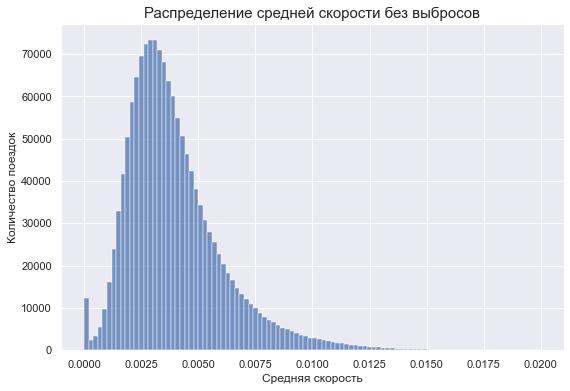

In [54]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение средней скорости без выбросов', fontsize=15)
ax.set_xlabel('Средняя скорость')
ax.set_ylabel('Количество поездок')
sns.histplot(average_v[average_v < 0.02], bins=100, ax=ax);

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [55]:
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


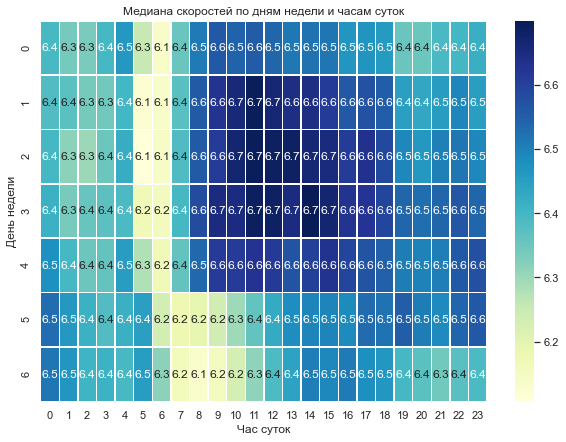

In [56]:
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['hour_of_day'] = data['pickup_datetime'].dt.hour

pivot_table = data.pivot_table(index='day_of_week', columns='hour_of_day', values='log_trip_duration', aggfunc=np.median)

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Медиана скоростей по дням недели и часам суток')
plt.xlabel('Час суток')
plt.ylabel('День недели')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Существуют существенные выбросы, которые бы искажали результаты работы

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Наименьшая скорость в период час-пика в период с 5 до 7

In [48]:
data['traffic_jam'] = ((data['hour_of_day'] >= 5) & (data['hour_of_day'] <= 7) & (data['day_of_week'] < 5)).astype(int)

data['clear_roads'] = ~data['traffic_jam']

data[['hour_of_day', 'day_of_week', 'traffic_jam', 'clear_roads']].head()

,hour_of_day,day_of_week,traffic_jam,clear_roads
0,17,0,0,-1
1,0,6,0,-1
2,11,1,0,-1
3,19,2,0,-1
4,13,5,0,-1


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, lat_range, lon_range, grid_size):
        self.lat_range = lat_range
        self.lon_range = lon_range
        self.grid_size = grid_size

    def fit(self, X, y=None):
        self.lat_step = (self.lat_range[1] - self.lat_range[0]) / self.grid_size[0]
        self.lon_step = (self.lon_range[1] - self.lon_range[0]) / self.grid_size[1]
        return self

    def transform(self, X):
        X_transformed = np.zeros((X.shape[0], 2), dtype=int)
        X_transformed[:, 0] = ((X.iloc[:, 5] - self.lat_range[0]) // self.lat_step) * self.grid_size[1] + ((X.iloc[:, 4] - self.lon_range[0]) // self.lon_step)
        X_transformed[:, 1] = ((X.iloc[:, 7] - self.lat_range[0]) // self.lat_step) * self.grid_size[1] + ((X.iloc[:, 6] - self.lon_range[0]) // self.lon_step)
        return X_transformed


    
transformer = MapGridTransformer(lat_range=(40, 41), lon_range=(-74, -73), grid_size=(10, 10))
transformer.fit(X_train)
X_train_transformed = transformer.transform(X_train)
X_test_transformed = transformer.transform(X_test)



X_train_transformed_positive = X_train_transformed_np[X_train_transformed_np >= 0]

num_cells_created = transformer.grid_size[0] * transformer.grid_size[1]

trips_per_cell = np.bincount(X_train_transformed_positive.flatten())

average_trips_per_cell = np.mean(trips_per_cell)

print("Количество созданных ячеек:", num_cells_created)
print("Количество поездок в каждой ячейке:", trips_per_cell)
print("Среднее количество поездок на ячейку:", average_trips_per_cell)

Количество созданных ячеек: 100
Количество поездок в каждой ячейке: [0 0 0 ... 0 0 1]
Среднее количество поездок на ячейку: 1713.148489932886


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

vendor_id: Этот признак указывает на поставщика услуги такси. Возможно, разные поставщики могут иметь разные тарифы, уровень обслуживания или доступность в определенных районах. Поэтому этот признак может оказаться полезным для прогнозирования времени и стоимости поездки.

passenger_count: Этот признак указывает на количество пассажиров в такси. Количество пассажиров может влиять на длительность поездки (например, больше пассажиров может привести к более долгой загрузке/выгрузке или выбору более крупного такси) и выбор тарифа (например, для большего количества пассажиров может быть необходимо брать более крупное такси). Поэтому этот признак также может быть полезным для прогнозирования времени и стоимости поездки.

store_and_fwd_flag: Этот признак указывает, была ли поездка отправлена немедленно или отложена для отправки в более позднее время. Этот признак может быть полезным для анализа надежности системы отправки данных и ее влияния на длительность поездки.

In [86]:
unique_vendor_ids = data['vendor_id'].nunique()
unique_passenger_counts = data['passenger_count'].nunique()
unique_store_and_fwd_flags = data['store_and_fwd_flag'].nunique()

print("Уникальные значения для vendor_id:", unique_vendor_ids)
print("Уникальные значения для passenger_count:", unique_passenger_counts)
print("Уникальные значения для store_and_fwd_flag:", unique_store_and_fwd_flags)

Уникальные значения для vendor_id: 2
Уникальные значения для passenger_count: 10
Уникальные значения для store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

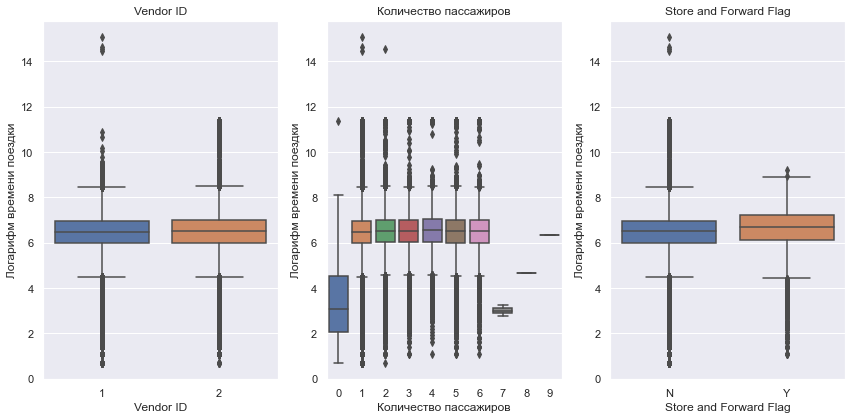

In [88]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='vendor_id', y='log_trip_duration', data=data)

plt.title('Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Логарифм времени поездки')

plt.subplot(1, 3, 2)
sns.boxplot(x='passenger_count', y='log_trip_duration', data=data)

plt.title('Количество пассажиров')
plt.xlabel('Количество пассажиров')
plt.ylabel('Логарифм времени поездки')

plt.subplot(1, 3, 3)
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=data)

plt.title('Store and Forward Flag')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Логарифм времени поездки')

plt.tight_layout()
plt.show()


Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [89]:
data['vendor_id'] = data['vendor_id'].map({1: 0, 2: 1})
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [91]:
X = data.drop(['log_trip_duration'], axis=1)
y = data['log_trip_duration']

categorical_features = ['vendor_id', 'store_and_fwd_flag', 'passenger_count']
numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', Ridge())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Коэффициент детерминации (R^2):", r2)
print("Среднеквадратичная ошибка (MSE):", mse)
print("Средняя абсолютная ошибка (MAE):", mae)

Коэффициент детерминации (R^2): 0.047135700066767594
Среднеквадратичная ошибка (MSE): 0.6046734584617627
Средняя абсолютная ошибка (MAE): 0.5903303406119066


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.